In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Treatment Prediciton.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,Target
0,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,2,0,1,648,250,V27,6,None,None,Drug
1,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,0,0,0,8,250.43,403,7,None,None,Solo_Insulin
2,42570,77586282,Caucasian,Male,[80-90),?,1,6,7,10,...,0,0,0,428,411,427,8,None,None,Solo_Insulin
3,73578,86328819,AfricanAmerican,Male,[60-70),?,1,3,7,12,...,0,0,0,999,507,996,9,None,None,Solo_Insulin
4,84222,108662661,Caucasian,Female,[50-60),?,1,1,7,3,...,0,0,0,682,174,250,3,None,None,Drug


In [3]:
df = df.replace('?',np.nan)

In [4]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                          834
gender                          0
age                             0
weight                      27772
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  11495
medical_specialty           13406
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          3
diag_2                        171
diag_3                        585
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
Target                          0
dtype: int64

In [5]:
for column in df.columns:
    print(column,':',round(df[column].isnull().sum()/df.shape[0] * 100, ndigits=2),'% of missing values')

encounter_id : 0.0 % of missing values
patient_nbr : 0.0 % of missing values
race : 2.93 % of missing values
gender : 0.0 % of missing values
age : 0.0 % of missing values
weight : 97.5 % of missing values
admission_type_id : 0.0 % of missing values
discharge_disposition_id : 0.0 % of missing values
admission_source_id : 0.0 % of missing values
time_in_hospital : 0.0 % of missing values
payer_code : 40.36 % of missing values
medical_specialty : 47.07 % of missing values
num_lab_procedures : 0.0 % of missing values
num_procedures : 0.0 % of missing values
num_medications : 0.0 % of missing values
number_outpatient : 0.0 % of missing values
number_emergency : 0.0 % of missing values
number_inpatient : 0.0 % of missing values
diag_1 : 0.01 % of missing values
diag_2 : 0.6 % of missing values
diag_3 : 2.05 % of missing values
number_diagnoses : 0.0 % of missing values
max_glu_serum : 0.0 % of missing values
A1Cresult : 0.0 % of missing values
Target : 0.0 % of missing values


In [6]:
cols_with_id = []
for col in df.columns:
    if 'id' in col:
        cols_with_id.append(col)

cols_with_id

['encounter_id',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id']

In [7]:
df.drop(cols_with_id,inplace=True,axis=1)
df.drop(['weight'],inplace=True,axis=1)

In [8]:
df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'Target'],
      dtype='object')

In [9]:
X = df.drop('Target',axis=1)
y = df['Target']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [11]:
X_train.isna().sum()

patient_nbr               0
race                    652
gender                    0
age                       0
time_in_hospital          0
payer_code             9205
medical_specialty     10741
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                    3
diag_2                  153
diag_3                  489
number_diagnoses          0
max_glu_serum             0
A1Cresult                 0
dtype: int64

mode values can be used to impute the features race, diag1, diag2, diag3 since they have very less missing values.

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
# Training Set
impute = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
impute.fit(X_train[['race','diag_1','diag_2','diag_3']])
X_train[['race','diag_1','diag_2','diag_3']] = impute.transform(X_train[['race','diag_1','diag_2','diag_3']])

In [14]:
# Test Set
impute = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
impute.fit(X_test[['race','diag_1','diag_2','diag_3']])
X_test[['race','diag_1','diag_2','diag_3']] = impute.transform(X_test[['race','diag_1','diag_2','diag_3']])

In [15]:
X_train.isna().sum()

patient_nbr               0
race                      0
gender                    0
age                       0
time_in_hospital          0
payer_code             9205
medical_specialty     10741
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                    0
diag_2                    0
diag_3                    0
number_diagnoses          0
max_glu_serum             0
A1Cresult                 0
dtype: int64

In [16]:
X_train.drop(['payer_code','medical_specialty','patient_nbr'],axis=1,inplace=True)
X_test.drop(['payer_code','medical_specialty','patient_nbr'],axis=1,inplace=True)

In [17]:
X_train.isna().sum()

race                  0
gender                0
age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
number_diagnoses      0
max_glu_serum         0
A1Cresult             0
dtype: int64

In [18]:
X_train.nunique()

race                    5
gender                  3
age                    10
time_in_hospital       14
num_lab_procedures    112
num_procedures          7
num_medications        68
number_outpatient      22
number_emergency       14
number_inpatient       14
diag_1                569
diag_2                570
diag_3                608
number_diagnoses       16
max_glu_serum           4
A1Cresult               4
dtype: int64

In [19]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

X_train = X_train.apply(lbl.fit_transform)
X_test = X_test.apply(lbl.fit_transform)


In [20]:
X_train

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult
17947,2,1,6,0,73,0,8,2,0,0,442,202,197,6,2,1
27855,2,0,8,3,28,0,10,0,0,0,417,193,284,8,2,2
12065,2,1,7,2,2,1,7,5,2,0,554,509,588,4,2,2
22148,2,1,8,0,27,0,5,2,0,2,276,214,217,8,2,2
26448,0,1,5,3,47,1,24,0,0,0,477,193,597,8,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,2,1,6,2,23,1,24,0,0,0,411,210,590,6,2,2
28017,2,0,6,0,0,2,4,0,0,0,222,212,216,7,2,2
17728,0,0,4,0,26,0,7,0,1,0,442,56,198,2,2,2
7293,2,1,9,2,32,0,7,0,0,0,100,325,218,4,2,2


<AxesSubplot:>

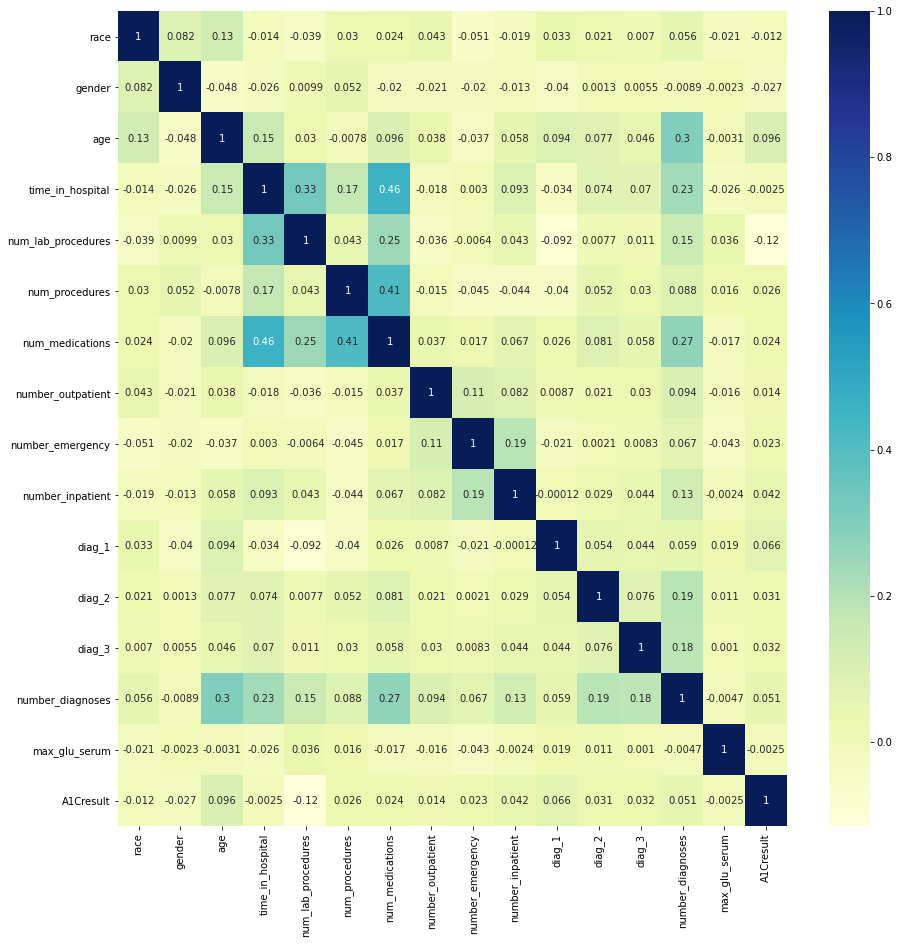

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True,cmap="YlGnBu")

In [22]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features = correlation(X_train, 0.75)
corr_features

set()

In [24]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

y_train = pd.DataFrame(y_train).apply(lbl.fit_transform)
y_test = pd.DataFrame(y_test).apply(lbl.fit_transform)


In [25]:
y_train

,Target
17947,1
27855,0
12065,0
22148,1
26448,1
...,...
7291,0
28017,0
17728,1
7293,0


In [26]:
X_train.to_csv('X_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)